In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [24]:
cd= pd.read_csv("D://assignments//Assignment 14//Company_Data.csv")
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [25]:
label_encoder = preprocessing.LabelEncoder()
cd['ShelveLoc']= label_encoder.fit_transform(cd['ShelveLoc']) 
cd['Urban']= label_encoder.fit_transform(cd['Urban'])
cd['US']= label_encoder.fit_transform(cd['US'])

In [26]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [30]:
bd=cd

In [31]:
bd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [34]:
def func(x):
    if  x < 8:
        return 'no'
    else :
        return 'yes'

In [35]:
bd['Sales_new'] = bd['Sales'].apply(func)


In [36]:
bd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_new
0,9.50,138,73,11,276,120,0,42,17,1,1,yes
1,11.22,111,48,16,260,83,1,65,10,1,1,yes
2,10.06,113,35,10,269,80,2,59,12,1,1,yes
3,7.40,117,100,4,466,97,2,55,14,1,1,no
4,4.15,141,64,3,340,128,0,38,13,1,0,no


In [37]:
bd['Sales_new']= label_encoder.fit_transform(cd['Sales_new'])

In [43]:
bd[bd.duplicated()].shape

(0, 12)

In [49]:
bd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_new      0
dtype: int64

In [50]:
x=bd.iloc[:,1:10]
y=bd['Sales_new']

In [51]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [52]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_new, Length: 400, dtype: int32

In [54]:
bd.Sales_new.value_counts()

0    236
1    164
Name: Sales_new, dtype: int64

In [55]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [67]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

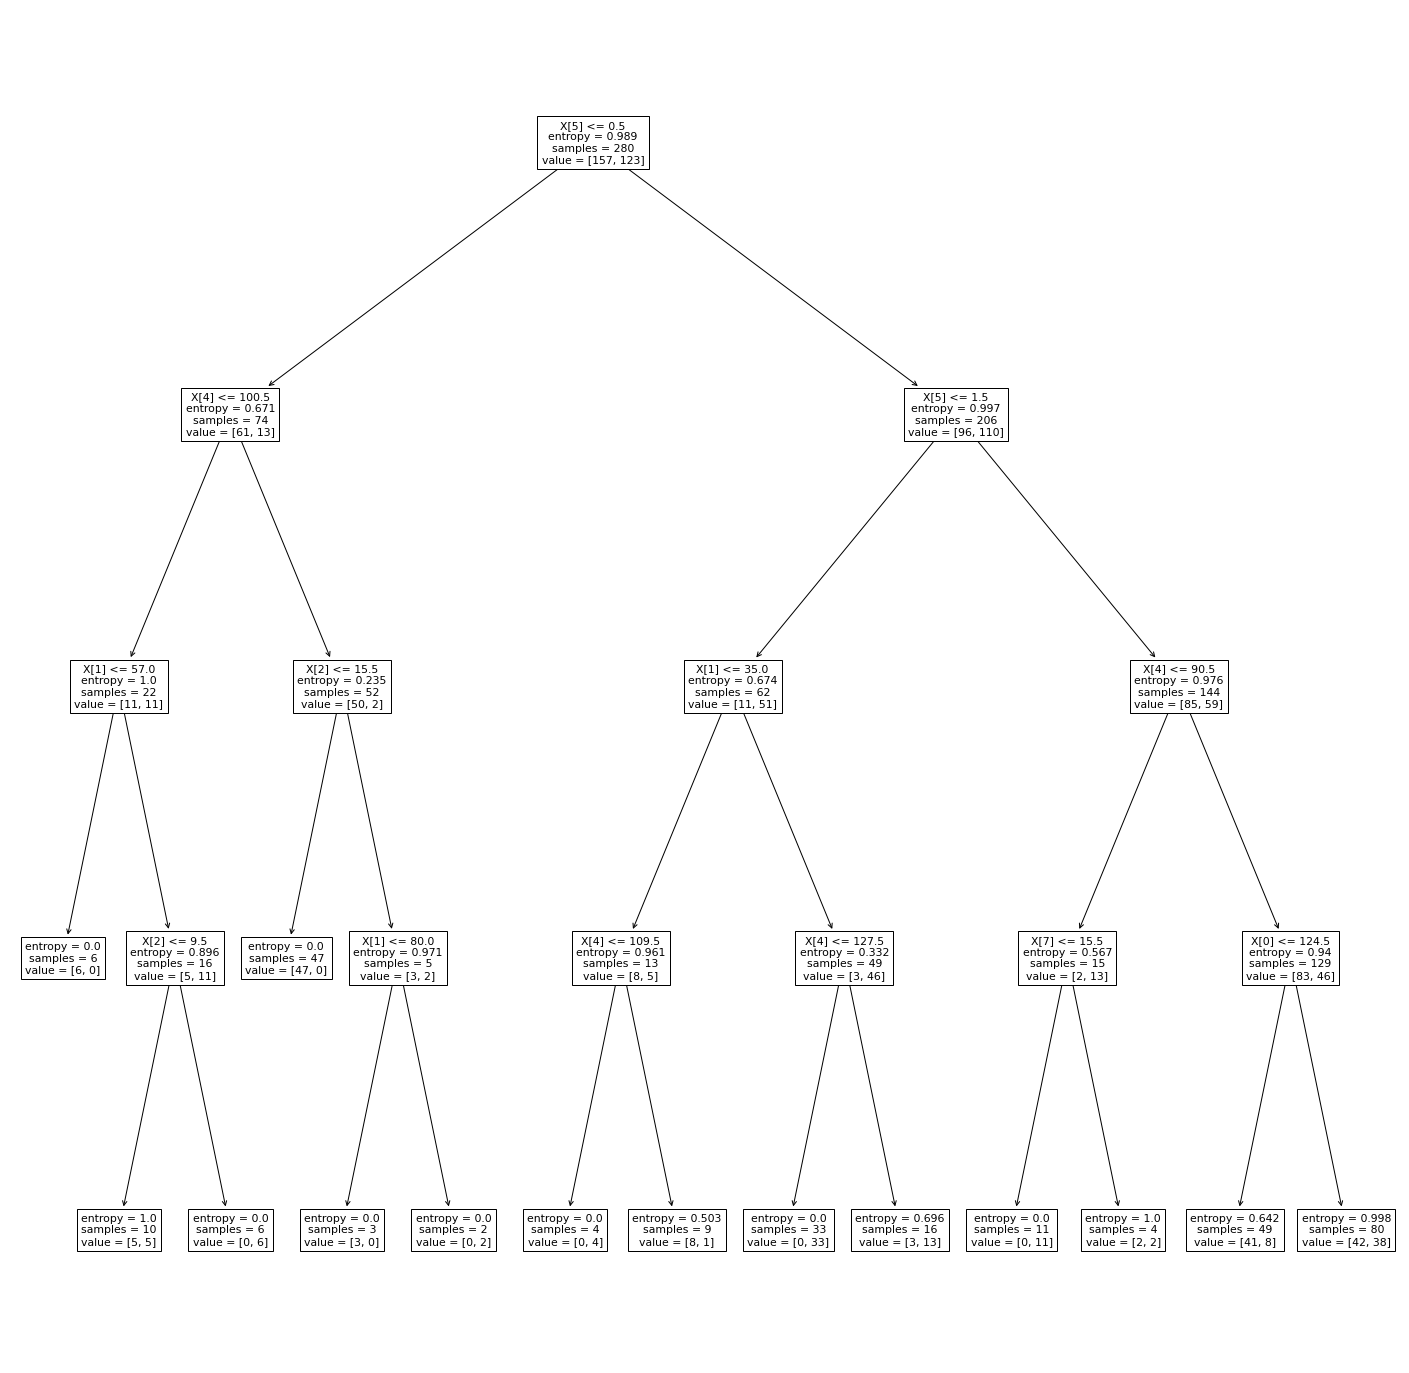

In [68]:
plt.figure(figsize=(25,25))
tree.plot_tree(model);


In [69]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    95
1    25
dtype: int64

In [70]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_new,,
0,72,7
1,23,18


In [72]:
np.mean(preds==y_test)

0.75